# Author : Owen Nda Diche

# PowerCo Churn – Exploratory Data Analysis (EDA)

## Objective
In this step, we perform exploratory data analysis (EDA) on the three datasets provided by PowerCo:
1. Historical customer data
2. Historical pricing data
3. Churn indicator data

We will focus on:
- Reviewing the **data types** of each column
- Understanding the **distribution** of values across columns
- Producing summary statistics to understand data quality and variation


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

## Load the datasets
Update the filenames below to match the files provided by the client.


In [17]:
CLIENT_PATH = "client_data.csv"
PRICE_PATH  = "price_data.csv"

df_client = pd.read_csv(CLIENT_PATH)
df_price  = pd.read_csv(PRICE_PATH)

print("Client data shape:", df_client.shape)
print("Price data shape:", df_price.shape)

display(df_client.head())
display(df_price.head())


Client data shape: (14606, 26)
Price data shape: (193002, 8)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Basic checks
We check for duplicates and missing values to understand data quality early.


In [19]:
def basic_checks(df: pd.DataFrame, name: str):
    print("="*80)
    print(f"{name} — Basic Checks")
    print("="*80)

    print("Shape:", df.shape)
    print("Duplicate rows:", df.duplicated().sum())

    missing_count = df.isna().sum().sort_values(ascending=False)
    missing_pct = (missing_count / len(df) * 100).round(2)

    checks = pd.DataFrame({
        "missing_count": missing_count,
        "missing_%": missing_pct
    })
    display(checks[checks["missing_count"] > 0])

basic_checks(df_client, "Client Dataset")
basic_checks(df_price, "Price Dataset")


Client Dataset — Basic Checks
Shape: (14606, 26)
Duplicate rows: 0


,missing_count,missing_%


Price Dataset — Basic Checks
Shape: (193002, 8)
Duplicate rows: 0


,missing_count,missing_%


## Standardize non-standard missing values
Some datasets use text markers like "MISSING" instead of true nulls.
We convert common markers to `NaN` so missingness is measured correctly.


In [20]:
MISSING_MARKERS = ["MISSING", "missing", "NA", "N/A", "-", "null", "None", ""]

def standardize_missing_markers(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    obj_cols = df.select_dtypes(include=["object"]).columns
    for c in obj_cols:
        df[c] = df[c].replace(MISSING_MARKERS, np.nan)
    return df

df_client = standardize_missing_markers(df_client)
df_price  = standardize_missing_markers(df_price)

print("Non-standard missing markers standardized.")
basic_checks(df_client, "Client Dataset (after standardizing missing)")
basic_checks(df_price, "Price Dataset (after standardizing missing)")


Non-standard missing markers standardized.
Client Dataset (after standardizing missing) — Basic Checks
Shape: (14606, 26)
Duplicate rows: 0


,missing_count,missing_%
channel_sales,3725,25.50
origin_up,64,0.44


Price Dataset (after standardizing missing) — Basic Checks
Shape: (193002, 8)
Duplicate rows: 0


,missing_count,missing_%


## Data types + column summary
We inspect dtypes to ensure fields like dates are not stored as plain text, and IDs remain identifiers.


In [21]:
def column_summary(df: pd.DataFrame, name: str):
    print("="*80)
    print(f"{name} — Column Summary")
    print("="*80)

    summary = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "n_unique": df.nunique(dropna=True),
        "missing_count": df.isna().sum(),
        "missing_%": (df.isna().sum() / len(df) * 100).round(2)
    }).sort_values(["missing_count", "n_unique"], ascending=[False, False])

    display(summary)

column_summary(df_client, "Client Dataset")
column_summary(df_price, "Price Dataset")


Client Dataset — Column Summary


,dtype,n_unique,missing_count,missing_%
channel_sales,object,7,3725,25.50
origin_up,object,5,64,0.44
id,object,14606,0,0.00
forecast_cons_12m,float64,13993,0,0.00
net_margin,float64,11965,0,0.00
cons_12m,int64,11065,0,0.00
imp_cons,float64,7752,0,0.00
cons_last_month,int64,4751,0,0.00
forecast_cons_year,int64,4218,0,0.00
forecast_meter_rent_12m,float64,3528,0,0.00


Price Dataset — Column Summary


,dtype,n_unique,missing_count,missing_%
id,object,16096,0,0.0
price_off_peak_var,float64,1853,0,0.0
price_peak_var,float64,1189,0,0.0
price_mid_peak_var,float64,711,0,0.0
price_off_peak_fix,float64,66,0,0.0
price_peak_fix,float64,31,0,0.0
price_mid_peak_fix,float64,28,0,0.0
price_date,object,12,0,0.0


## Parse date columns
We attempt to convert any column containing "date" or "time" into datetime.
This helps later analysis and sorting by time.


In [22]:
def parse_date_columns(df: pd.DataFrame, name: str):
    df = df.copy()
    date_cols = [c for c in df.columns if ("date" in c.lower()) or ("time" in c.lower())]
    for c in date_cols:
        df[c] = pd.to_datetime(df[c], errors="coerce")
    print(f"{name}: parsed date-like columns -> {date_cols}")
    return df, date_cols

df_client, client_date_cols = parse_date_columns(df_client, "Client Dataset")
df_price, price_date_cols   = parse_date_columns(df_price, "Price Dataset")

# Confirm dtypes after parsing
print("\nClient date dtypes:")
print(df_client[client_date_cols].dtypes if len(client_date_cols) else "No date columns detected.")

print("\nPrice date dtypes:")
print(df_price[price_date_cols].dtypes if len(price_date_cols) else "No date columns detected.")


Client Dataset: parsed date-like columns -> ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
Price Dataset: parsed date-like columns -> ['price_date']

Client date dtypes:
date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object

Price date dtypes:
price_date    datetime64[ns]
dtype: object


## Descriptive statistics
We compute summary statistics for numeric and categorical columns to understand spread, central tendency, and category dominance.


In [23]:
def descriptive_stats(df: pd.DataFrame, name: str):
    print("="*80)
    print(f"{name} — Descriptive Statistics")
    print("="*80)

    num = df.select_dtypes(include=[np.number])
    cat = df.select_dtypes(include=["object", "category"])

    if num.shape[1] > 0:
        print("\nNumeric stats:")
        display(num.describe().T)

    if cat.shape[1] > 0:
        print("\nCategorical stats:")
        display(cat.describe().T)

descriptive_stats(df_client, "Client Dataset")
descriptive_stats(df_price, "Price Dataset")


Client Dataset — Descriptive Statistics

Numeric stats:


,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01



Categorical stats:


,count,unique,top,freq
id,14606,14606,563dde550fd624d7352f3de77c0cdfcd,1
channel_sales,10881,7,foosdfpfkusacimwkcsosbicdxkicaua,6754
has_gas,14606,2,f,11955
origin_up,14542,5,lxidpiddsbxsbosboudacockeimpuepw,7097


Price Dataset — Descriptive Statistics

Numeric stats:


,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221



Categorical stats:


,count,unique,top,freq
id,193002,16096,cce1215d5c9330d9098f8fbcb62bd261,12


## Distributions: numeric columns
We plot histograms for numeric columns to understand skew, outliers, and typical ranges.
To keep visuals readable, we limit the number of columns plotted.


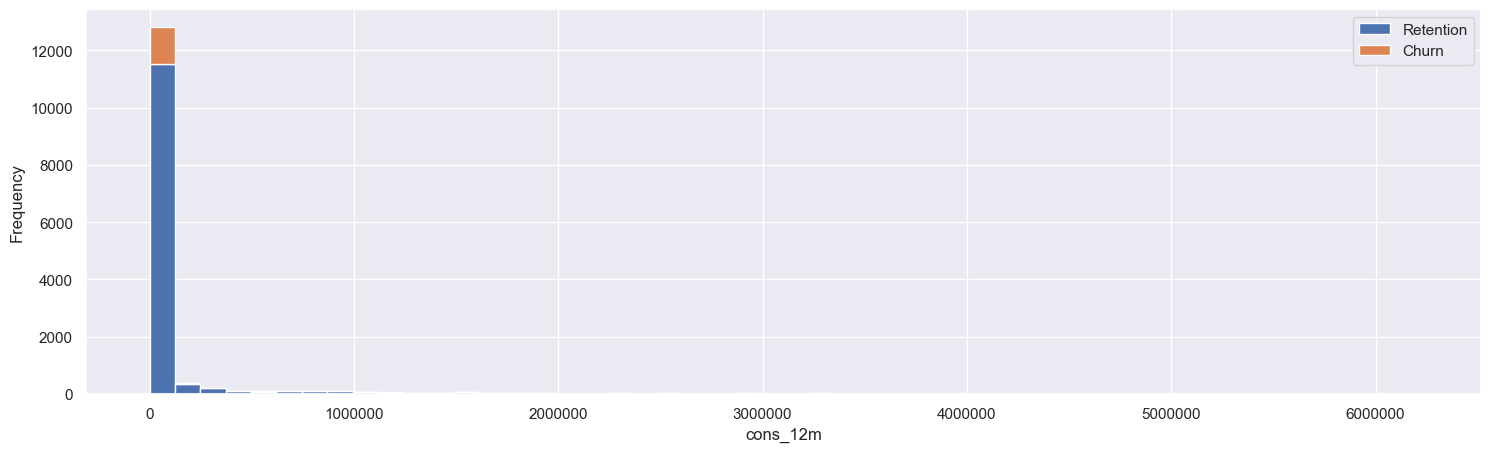

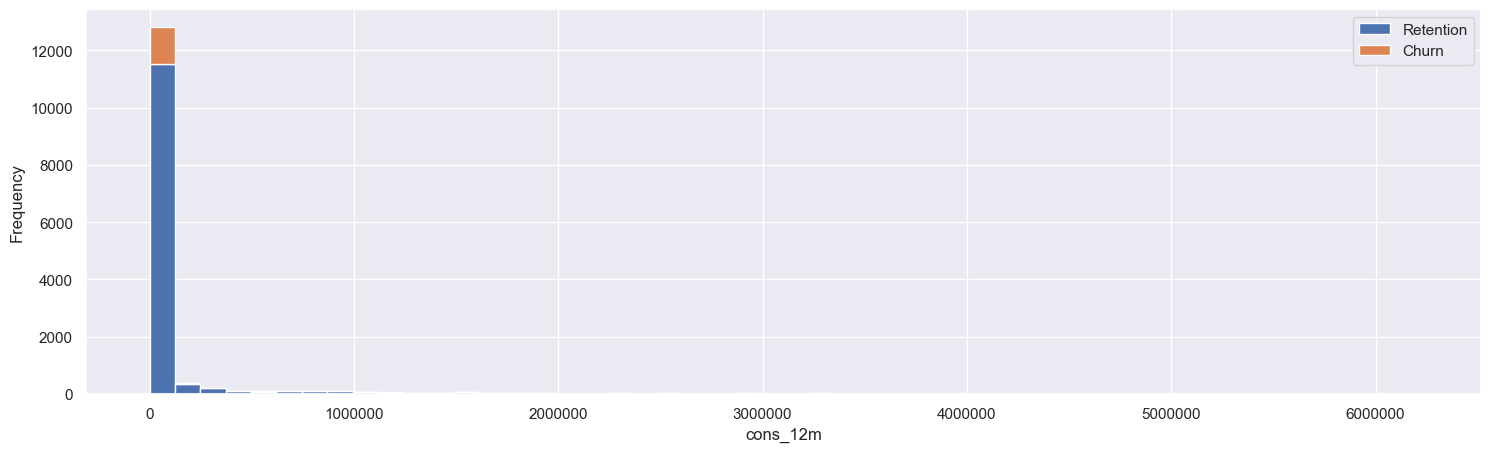

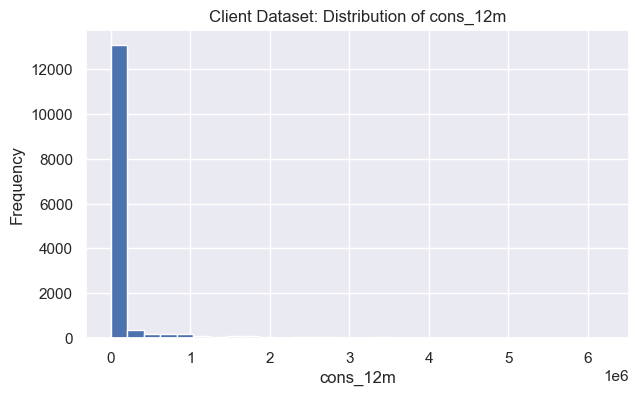

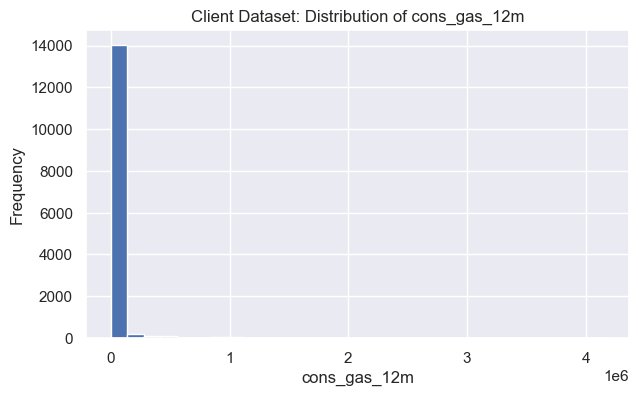

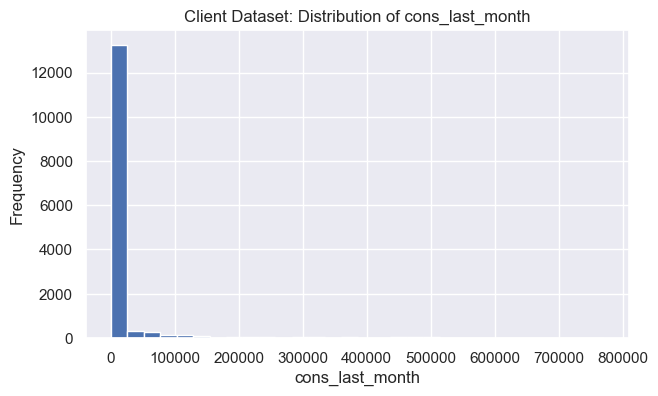

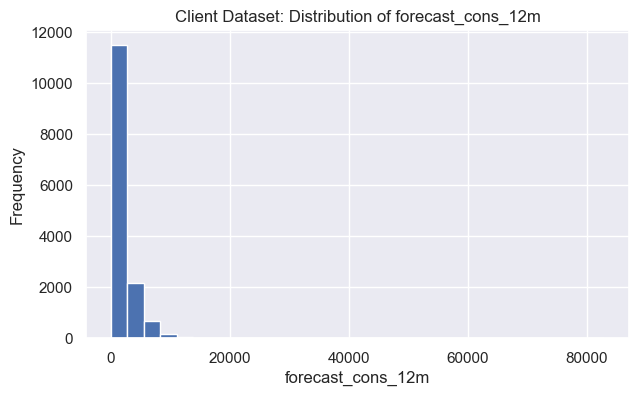

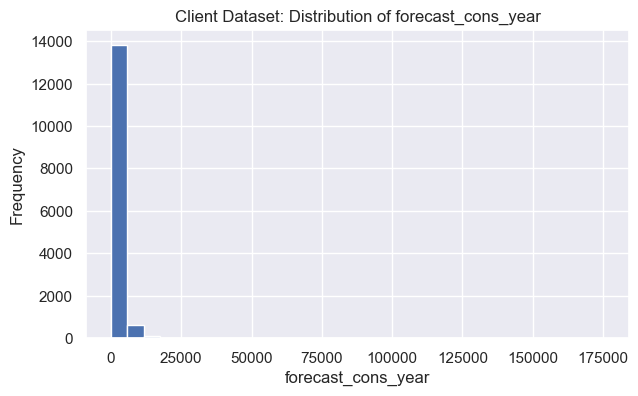

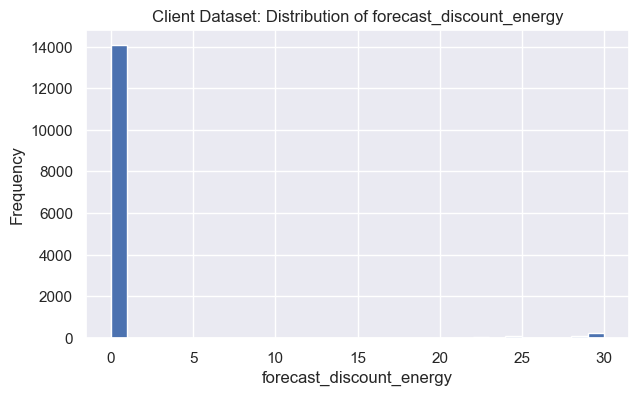

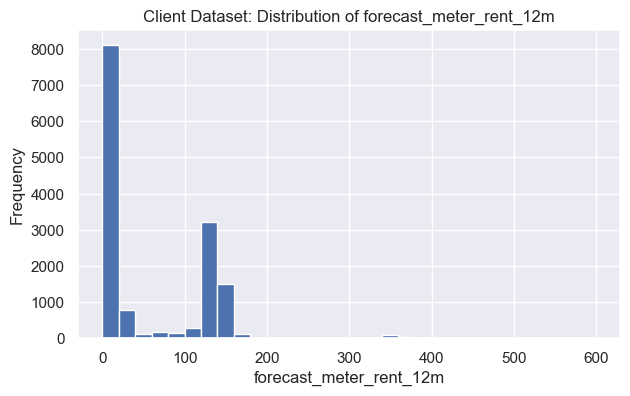

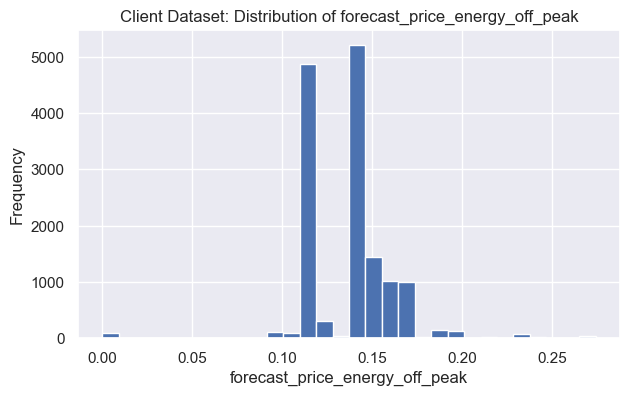

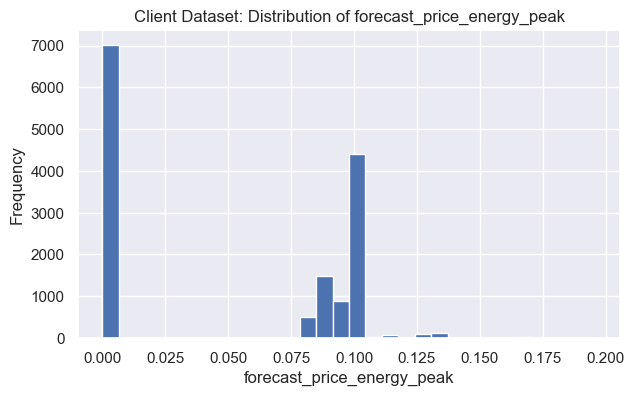

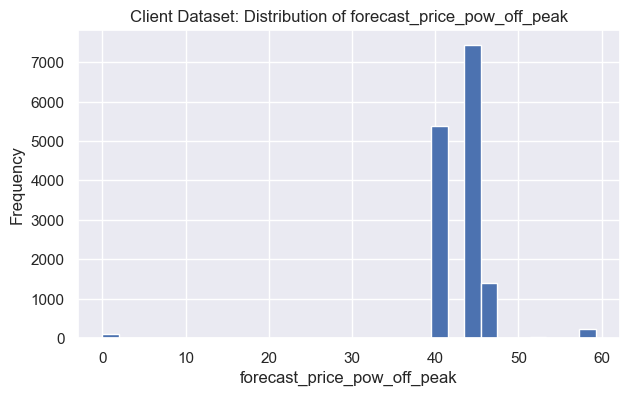

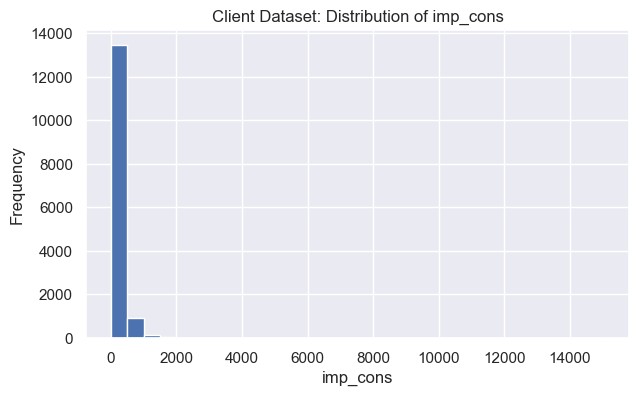

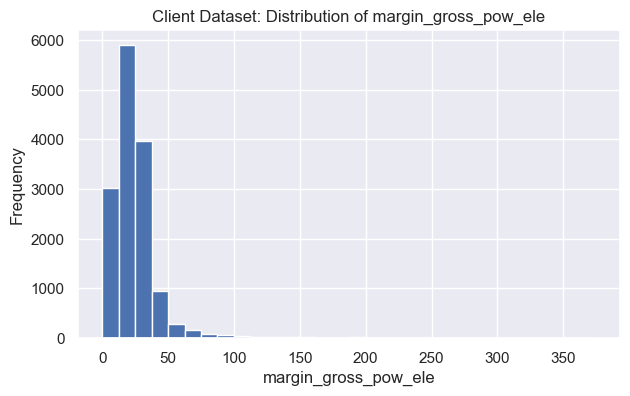

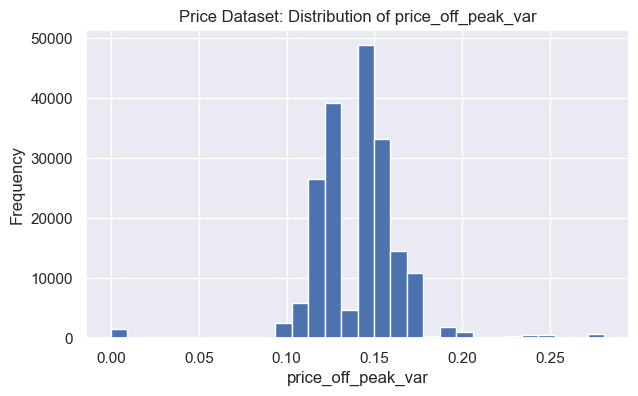

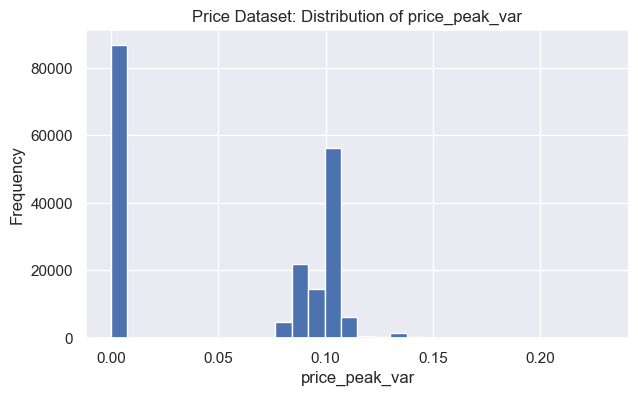

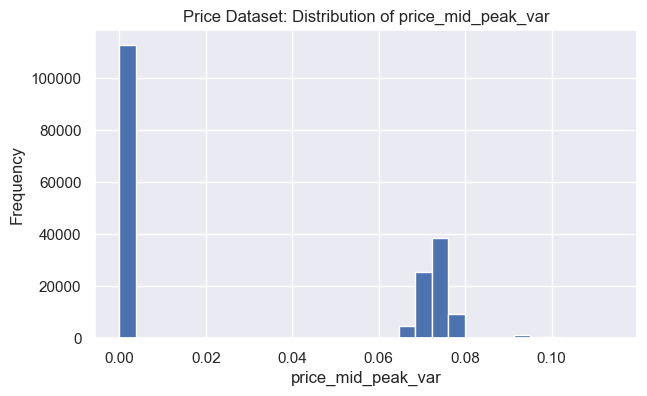

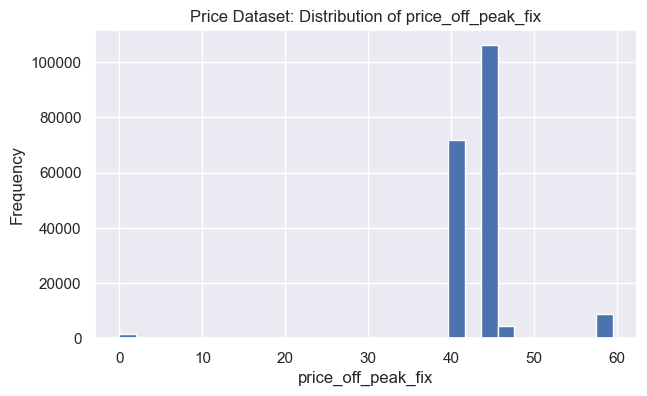

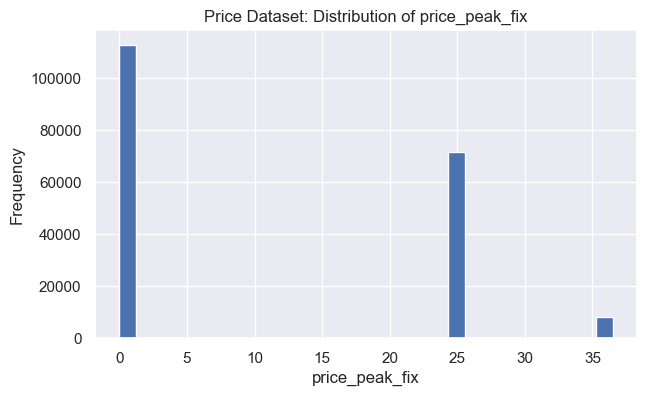

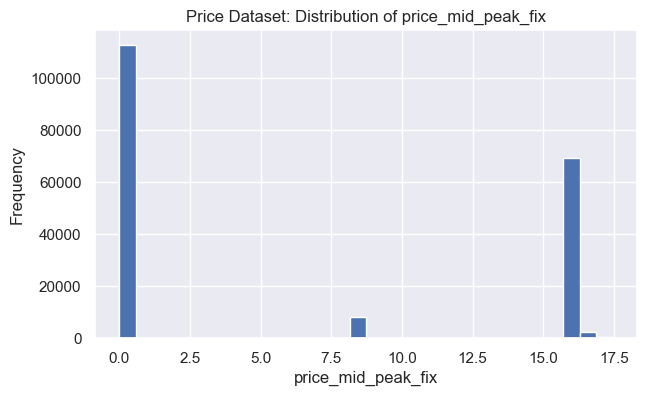

In [24]:
def plot_numeric_distributions(df: pd.DataFrame, name: str, max_cols: int = 12):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        print(f"{name}: No numeric columns found.")
        return

    num_cols = num_cols[:max_cols]

    for col in num_cols:
        plt.figure(figsize=(7, 4))
        df[col].dropna().hist(bins=30)
        plt.title(f"{name}: Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

plot_numeric_distributions(df_client, "Client Dataset")
plot_numeric_distributions(df_price, "Price Dataset")


## Distributions: categorical columns
For categorical variables, we plot the top categories only to avoid overcrowded charts.


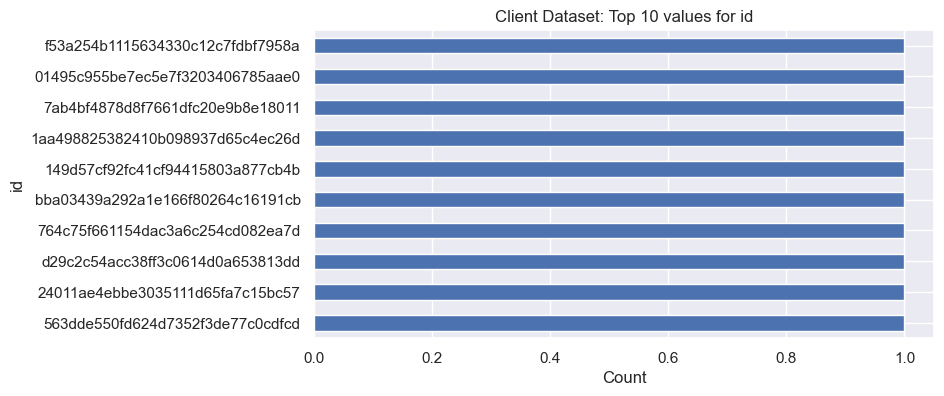

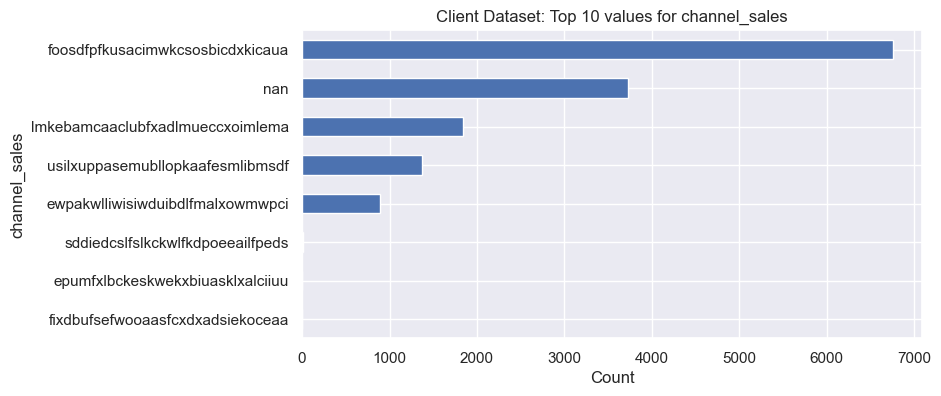

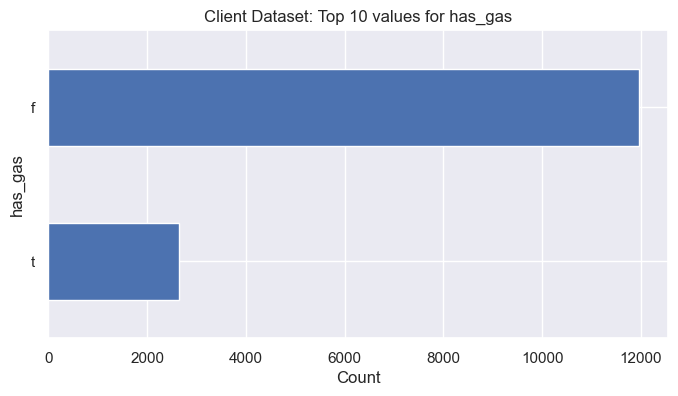

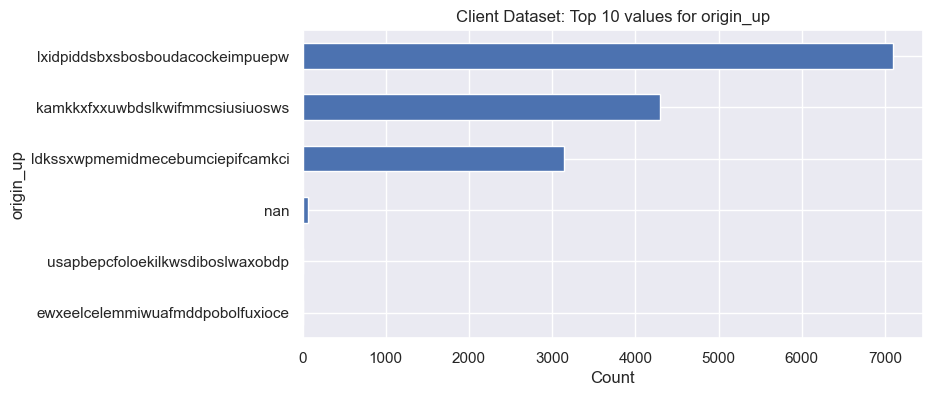

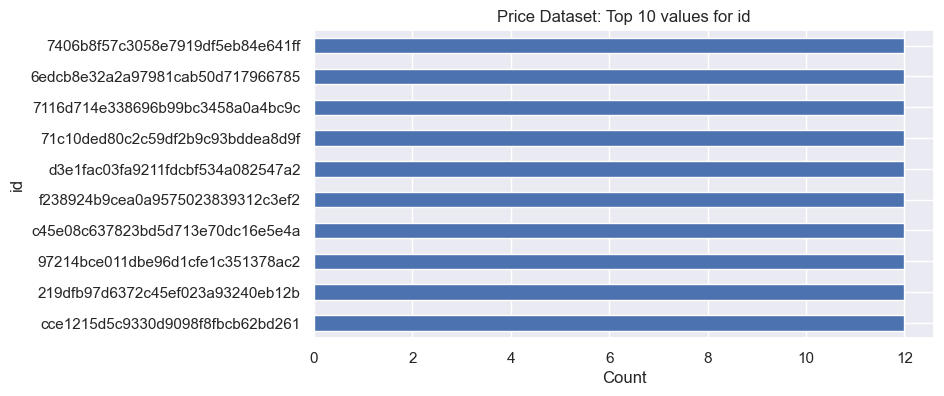

In [25]:
def plot_categorical_distributions(df: pd.DataFrame, name: str, top_n: int = 10, max_cols: int = 12):
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    if not cat_cols:
        print(f"{name}: No categorical columns found.")
        return

    cat_cols = cat_cols[:max_cols]

    for col in cat_cols:
        vc = df[col].value_counts(dropna=False).head(top_n)

        plt.figure(figsize=(8, 4))
        vc.sort_values().plot(kind="barh")
        plt.title(f"{name}: Top {top_n} values for {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

plot_categorical_distributions(df_client, "Client Dataset")
plot_categorical_distributions(df_price, "Price Dataset")


## Churn distribution
We verify the churn label distribution (important for imbalance).


Churn column present? True


churn
0    13187
1     1419
Name: count, dtype: int64

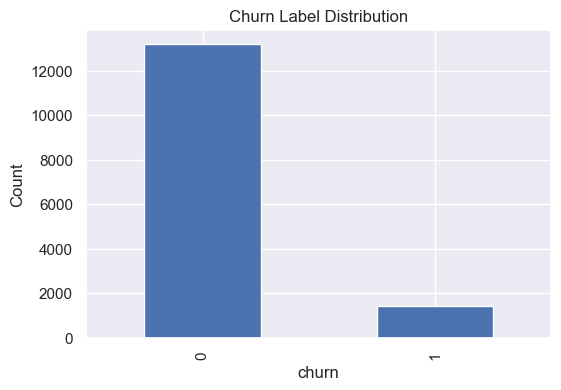

In [26]:
# Confirm churn column exists
print("Churn column present?", "churn" in df_client.columns)

display(df_client["churn"].value_counts(dropna=False))

plt.figure(figsize=(6, 4))
df_client["churn"].value_counts(dropna=False).plot(kind="bar")
plt.title("Churn Label Distribution")
plt.xlabel("churn")
plt.ylabel("Count")
plt.show()


## Key columns for merging
We identify shared columns across the two datasets (typically customer `id`).
This prepares us for combining client and price history later.


In [27]:
common_cols = sorted(list(set(df_client.columns).intersection(set(df_price.columns))))
print("Common columns between client_data and price_data:")
print(common_cols)

# Quick check: do both datasets contain 'id'?
if "id" in common_cols:
    print("\nUnique ids in client_data:", df_client["id"].nunique())
    print("Unique ids in price_data :", df_price["id"].nunique())

    # How many client ids appear in pricing?
    overlap = df_client["id"].isin(df_price["id"]).mean()
    print(f"\n% of client ids found in price data: {overlap*100:.2f}%")
else:
    print("\nNo obvious shared key found. You may need to merge using a different column.")


Common columns between client_data and price_data:
['id']

Unique ids in client_data: 14606
Unique ids in price_data : 16096

% of client ids found in price data: 100.00%


## EDA Takeaways

- **Data types:** All date-like columns were correctly parsed as datetimes. In `client_data`, `date_activ`, `date_end`, `date_modif_prod`, and `date_renewal` are not stored as `object`. In `price_data`, `price_date` is also correctly parsed (no date-like columns remain as `object`).

- **Missingness:** Missing values are concentrated in a small number of fields. In the client dataset, `channel_sales` has the highest missingness at **~25.50%**, while `origin_up` has very low missingness (**~0.44%**). The price dataset shows **no notable missing values**, indicating pricing fields are largely complete.

- **Distributions:** Several customer usage and value variables are **highly right-skewed with heavy tails**, indicating potential outliers. The strongest skew is seen in `net_margin` (max **24,570.65**, skew **~36.57**) and consumption-related fields such as `forecast_cons_year`, `cons_12m`, `cons_gas_12m`, and `cons_last_month` (large maxima and high positive skew). Pricing variables are comparatively more stable overall; most price columns show mild-to-moderate skew, with `price_off_peak_fix` showing notable negative skew.

- **Categorical dominance:** Some categorical variables are dominated by a few values. For example, `has_gas` is mostly **False (~81.85%)** vs **True (~18.15%)**. `origin_up` is dominated by a few categories (top category **~48.59%**) with minimal missingness (**~0.44%**). `channel_sales` is dominated by one category (**~46.24%**) and also has a substantial **NaN share (~25.50%)**, so it will require careful handling (imputation or explicit “Unknown” category). The `id` column behaves as an identifier.

- **Churn balance:** Churn is **imbalanced**. Non-churners (`0`) represent **~90.28% (13,187)** of customers, while churners (`1`) represent **~9.72% (1,419)**. Therefore, we should prioritize metrics such as **Recall, F1-score, and ROC-AUC**, and consider using class weights or threshold tuning.

- **Merge readiness:** `id` is the clear join key between datasets (`common columns: ['id']`). Pricing data provides **100% coverage** of client IDs, meaning all customers can be enriched with aggregated pricing features (e.g., mean/latest/volatility) before modelling.
